## Hands on - Logistic Regression


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize


In [2]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

### Logistic regression

In [4]:
data = loaddata('data/logregdata1.txt', ',')

Dimensions:  (100, 3)
[[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]]


In [5]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

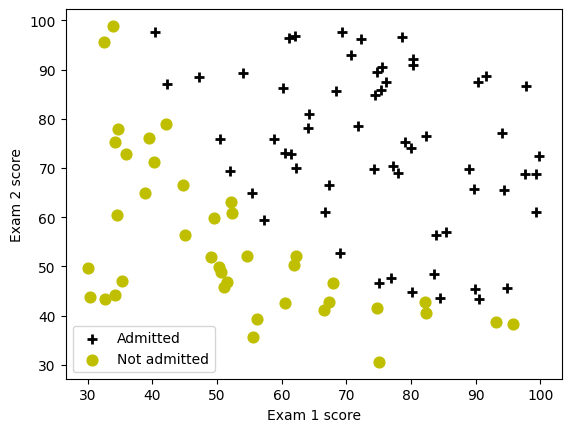

In [6]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

#### Logistic regression hypothesis
#### $$ h_{\theta}(x) = g(\theta^{T}x)$$
#### $$ g(z)=\frac{1}{1+e^{−z}} $$

In [11]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

#### Cost Function
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
#### Vectorized Cost Function
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

In [12]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1.0 * (1.0 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))
    if np.isnan(J[0]):
        return (np.inf)
    return J[0]

#### Partial derivative

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 
#### Vectorized
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$


In [13]:
def gradientdescent(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*X.T.dot(h-y)
        
    return(grad.flatten())

In [14]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradientdescent(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.6931471805599453
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


#### Optimize cost function

In [15]:
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradientdescent, options={'maxiter':400})
res

/var/folders/y1/f6lj2t4x565dxmd6gq0v_td40000gn/T/ipykernel_39249/196219480.py:4: RuntimeWarning: divide by zero encountered in log
  J = -1.0 * (1.0 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))
/var/folders/y1/f6lj2t4x565dxmd6gq0v_td40000gn/T/ipykernel_39249/196219480.py:4: RuntimeWarning: divide by zero encountered in log
  J = -1.0 * (1.0 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.20349770158950983
        x: [-2.516e+01  2.062e-01  2.015e-01]
      nit: 25
      jac: [-2.686e-09  4.364e-07 -1.397e-06]
 hess_inv: [[ 2.853e+03 -2.329e+01 -2.274e+01]
            [-2.329e+01  2.045e-01  1.730e-01]
            [-2.274e+01  1.730e-01  1.962e-01]]
     nfev: 31
     njev: 28

#### Predict

In [16]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [17]:
# Student with Exam 1 score 45 and Exam 2 score 85
# Predict using the optimized Theta values from above (res.x)
sigmoid(np.array([1, 45, 85]).dot(res.x.T))

np.float64(0.7762903249331021)

In [18]:
p = predict(res.x, X) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


#### Decision boundary

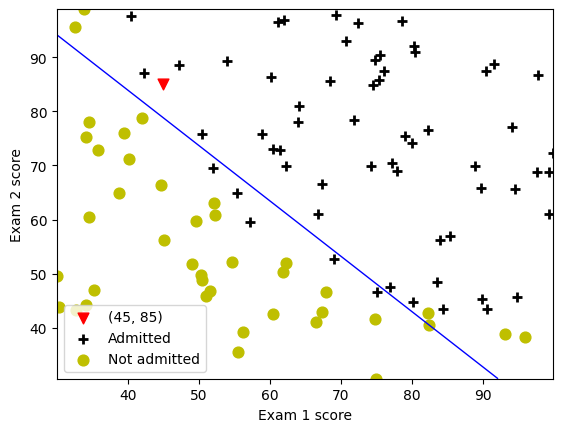

In [19]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');